# COGS 108 - Final Project

# Overview
   With the apparent tension in our culture regarding minorities and their relationship with the law enforcement, we wanted to see if there’s data that supports any overlooked biases. In our final project, we’re specifically exploring the relationships between the percentage of minorities, number of crimes, and police dispatch (response) time in Chicago. We have cleaned, analyzed, and visualized the data to show the relationship between the three components to see if our data can support any biases that may occur.

# Group Members & PIDS

- A12311299 - Vivian Thai
- A14886157 - Raghavan Kope
- A14976629 - Kelvin Chan
- A14086153 - Tong Jin
- A14556209 - Pranav Narasimmaraj
- A15749890 - Fernando Vazquez


# Research Question
Is there a relationship between higher percentage of ethnic minorities, number of crimes, and the length of police dispatch (response) time?

# Background & Prior Work
Within the past decade, there has been lots of controversy regarding police and minorities relations. We have witnessed tension between parties, political uprising, and protests all over the United States. With such polarizing events, we wanted to know if this cultural progression has any effect in the quality of service of our law enforcement and the minorities in our country. 

For our project, we found a dataset that documents all the crimes in Chicago from 2001-2017 [1]. Previously, people have used this same dataset to analyze what types of crimes have happened, the crime rates, and the trends of theft in each location over time [2, 3]. Past examples have also used this dataset to forecast crime in years 2017-2020 using machine learning and modeling [4]. For our specific project, we plan on using this dataset along with another dataset we have found on police dispatch (response) time and percentage of whites in Chicago in order to explore our research question. 

[1] https://www.kaggle.com/currie32/crimes-in-chicago

[2] https://www.kaggle.com/uds5501/chicago-crime-mapping

[3] https://www.kaggle.com/joydipnath/chicago-crime-data-analysis

[4] https://www.kaggle.com/umeshnarayanappa/forecasting-chicago-crimes-2017-2020

# Hypothesis

Our team hypothesizes that a slower police response time in a given district is primarily caused by a higher percentage of ethnic minorities in that district.

Our team hypothesizes this believing that perhaps due to cultural tensions in the United States, the law enforcement may be more slack in their response to crimes especially when considering high minority populated areas. 


# Dataset(s)

### Dataset #1
__Chicago Crimes 2001-2017 Dataset__ | __Columns Used__
- | - 
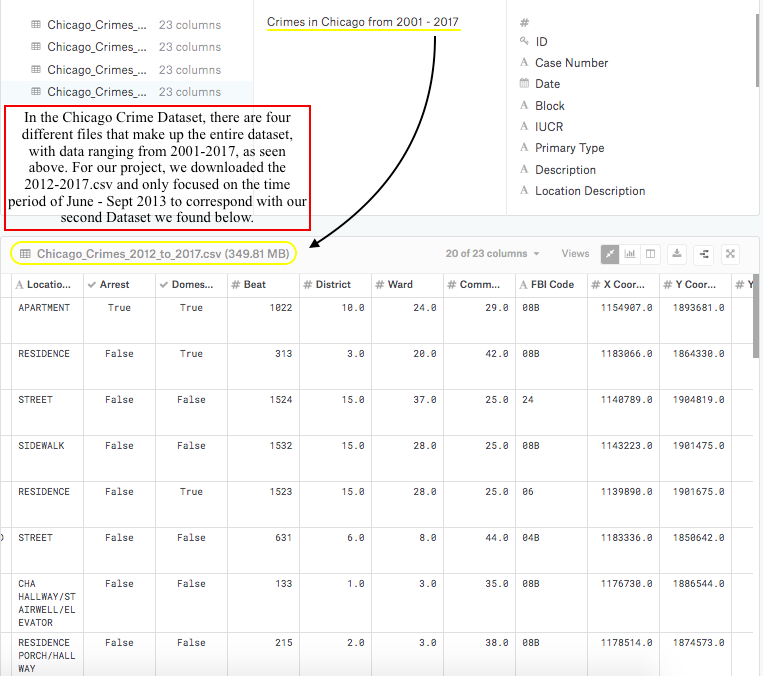| 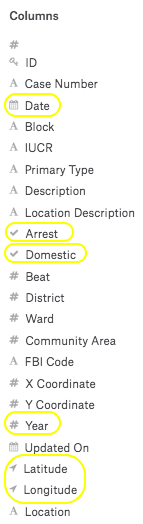

__[Figure 1] Chicago Crime Dataset - Dataset #1__

This is our Dataset # 1 that we're using for our project. As you can see from our visuals above, we have narrowed down our selection to __June - Sept 2013 of the Chicago Crime Dataset__, by dropping all the other data that doesn't correspond within that time frame. In regards to our columns, we only plan to use the __District, Arrest, Latitude, Longitude, Date, and Year columns__ because they are relevant to our research question. 

- __District:__ to match our datasets together (Dataset #1 & Dataset #2)
- __Arrest:__ to know how many arrest happened in each Chicago District
- __Latitude & Longitutde:__ used the coordinates to generate a heatmap of the arrests in Chicago
- __Date & Year:__ to match our this set of data with Dataset #2

For the purposes of the research question, this dataset __will serve to obtain data on the number of arrests per district and exact coordinates of each arrest.__ The entire dataset contains 1,456,598 observations, including data from 2012-2017. Because we narrowed down our data to June - Sept 2013 (inclusively), we ended up __using 110,204 observations__ from this dataset.

Link: https://www.kaggle.com/currie32/crimes-in-chicago


### Dataset #2
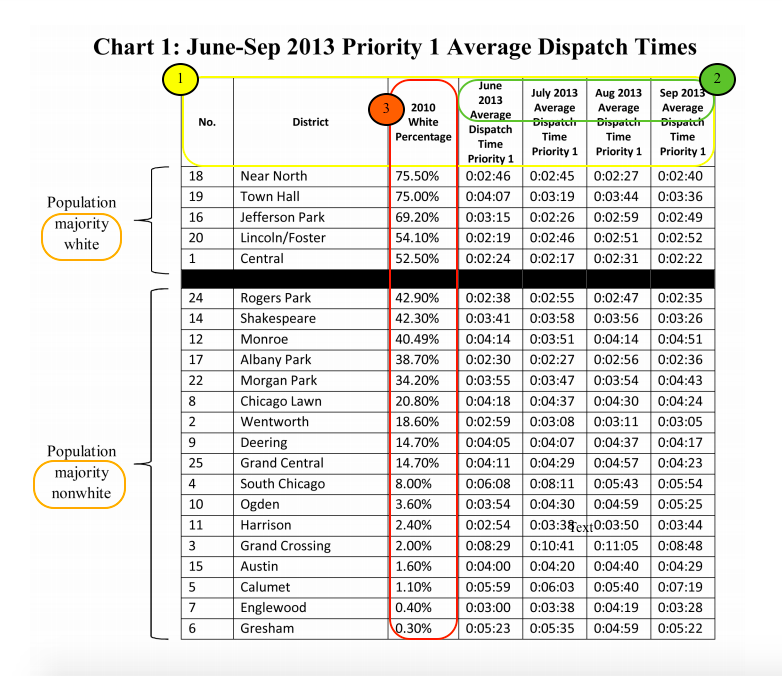

__[Figure 2] Average Dispatch Time - Dataset #2__

This infographic contains data on average police response time for the months of June 2013, July 2013, August 2013, and September 2013 for each district in Chicago. 

__[1]__ We have highlighted all the columns we have kept and used. The number corresponds to the District number, and the District column simply states the name of the district. We will use this information as a key to link our first dataset to the second dataset. 

__[2]__ This highlights the timeframe of the data we're using.

__[3]__ We see the 2010 White Percentage column that lists the percentage of white population for the given district. There are 5 districts that have a majority white population (meaning above 50% of the population - separated by the thick horizontal black bar), and 17 districts that do not have a majority white population.

The __number of observations__ in this dataset is __22__, since there are 22 districts in Chicago that the dataset reports on. The __average police dispatch times__ are given in __H:MM:SS__ format. A caveat is that we do not know the number of rows used to calculate the numbers present in the percentage of white population per district and the average police response times for June 2013 to September 2013. For the purposes of the research question, this dataset __will serve to obtain data on the average police response time in each district as well as the ethnic breakdown in each district.__

Link: https://www.aclu-il.org/sites/default/files/wp-content/uploads/2014/03/charts.pdf


#### Putting Dataset #1 & Dataset #2 together:

Since we only have data on average police response time for June 2013 - September 2013, we want to limit the amount of data we use in the first dataset. Hence, we did some data cleaning on the first dataset to make sure we only use rows where the month and year fall in between June 2013 and September 2013, inclusively. We then use the district number to map each row in the first dataset to the corresponding row in the second dataset before performing our data analysis.


# Setup

In [48]:
# installations
! pip install gmplot
! pip install gmaps
! pip install geopandas
! pip install descartes

In [49]:
# Imports

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pip install gmplot
import gmplot

# For improved table display in the notebook
from IPython.display import display

# pip install gmaps
import gmaps
import gmaps.datasets
import geopandas as gpd
import descartes

# Statmodels & patsy
import patsy
import statsmodels.api as sm


In [50]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Cleaning
### Steps to clean and read the Chicago Crime Dataset (Dataset #1)

1. Download the Chicago Crime Data from Kaggle (link can be found in Datasets Section)
2. Run the ``Chicago_Crimes_Data_Clean.ipynb`` to clean the data. Due to the size of the original dataset, we only included the cleaned data named ``Chicago_Crime_2013.csv`` in our repository. 

The code used to extract crime data of 2013 from June to June to September:
```
# Read the Chichago Crime Data from Kaggle Data set
df_crimes = pd.read_csv("Chicago_Crimes_2012_to_2017.csv")

#First limit to crimes only in 2013
df_crimes = df_crimes[df_crimes.Year == 2013]

#Limit the crimes to only be in June, July, August, September
df_crimes = df_crimes[df_crimes.Date.str[:2].isin(['06', '07', '08', '09'])]

#Remove rows with NaN location
df_crimes = df_crimes.dropna()

#Visualize the data 
df_crimes

#Exports to csv on local machine uncomment and change location path if you want to download locally
df_crimes.to_csv(r'./Chicago_Crime_2013.csv')
```

In [51]:
# Read in the cleaned data
df_crimes = pd.read_csv("Chicago_Crime_2013.csv")
df_crimes

,Unnamed: 0,Unnamed: 0.1,ID,Case Number,...,Updated On,Latitude,Longitude,Location
0,3101,792006,9296311,HW441116,...,04/15/2016 03:49:27 PM,41.78,-87.62,"(41.78024763, -87.615102958)"
1,7445,796449,9155853,HW301604,...,05/20/2016 03:52:25 PM,41.76,-87.57,"(41.76376382, -87.567687395)"
2,11061,800146,9241979,HW387874,...,05/23/2016 03:48:54 PM,41.86,-87.63,"(41.858594819, -87.627214427)"
...,...,...,...,...,...,...,...,...,...
110201,1417064,6196447,9198660,HW344257,...,02/04/2016 06:33:39 AM,41.78,-87.70,"(41.779090123, -87.695158983)"
110202,1417065,6196448,9291937,HW437071,...,02/04/2016 06:33:39 AM,41.78,-87.70,"(41.779090123, -87.695158983)"
110203,1421925,6201317,9167530,HW312673,...,12/06/2016 03:59:16 PM,41.97,-87.65,"(41.969595207, -87.654833992)"


__[Figure 3]. Cleaned Chicago Crime Dataset.__
This is the cleaned up Chicago Crime Dataset that we are using for all of our data visualizationa and analyzation. 

### Steps to clean and read Chicago Dispatch Time (Dataset #2)

__[Pre-Step 1. Removing data on crimes not from specific months in 2013 from Dataset #1]__

The original Chicago data set(Dataset #1) included a comprehensive list of crimes that occurred from 2001 to 2018. However, the data regarding police response times(Dataset #2) were only mapped to months in June through September. Our group decided to clean the original data to restrict it to crimes that occured only within these months in the year 2013. All crimes from 2001-2018 except 2013 were removed, to match our the timeframe from our Dataset #2.

1. Transferring data from PDF to xldr/csv:

To be able to parse one of the datasets which was on a pdf file, we had to use an online image to text converter. We made this decision based on the fact that we couldn't parse the pdf file directly since this file was an image based pdf instead of a text based pdf. Doing this made it easy to transfer the text from the table into columns which we then transposed into an excel file. Once we got the data into a file which could be parsed, we were able to load it into a pandas dataframe for further cleaning (renaming the columns) and being able to isolate and plot our graphs that depended on this dataset.


In [52]:
#Cleans the data of dispatch time to be more readable
dis = pd.read_csv('dispatch_time.csv')
dis

,No.,District,2010 White Percentage,June 2013 Average Dispatch Time Priority 1,July 2013 Average Dispatch Time Priority 1,Aug 2013 Average Dispatch Time Priority 1,Sep 2013 Average Dispatch Time Priority 1
0,18,Near North,75.50%,0:02:46,0:02:45,0:02:27,0:02:40
1,19,Town Hall,75.00%,0:04:07,0:03:19,0:03:44,0:03:36
2,16,Jefferson Park,69.20%,0:03:15,0:02:26,0:02:59,0:02:49
...,...,...,...,...,...,...,...
19,5,Calumet,1.10%,0:05:59,0:06:03,0:05:40,0:07:19
20,7,Englewood,0.40%,0:03:00,0:03:38,0:04:19,0:03:28
21,6,Gresham,0.30%,0:05:23,0:05:35,0:04:59,0:05:22


__[Figure 4]. Raw Average Police Dispatch Time Dataset.__
This is the raw dataset of the average police dispatch time dataset that we have obtained before cleaning it.

In [53]:
#rename each column 
dis.columns = ['No.', 'District', 'White_per', 'Jun', 'Jul', 'Aug','Sep']

# Standardize data in White_% column 
white = dis['White_per'].str.replace('%','')
dis['White_per'] = pd.to_numeric(white)
# Covert White_% data to 
dis['White_per'] = dis['White_per'].astype(int)

# Standardize data in dispatch time, changes each time to be only seconds 
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

dis["Jun"] = dis["Jun"].apply(get_sec)
dis["Jul"] = dis["Jul"].apply(get_sec)
dis["Aug"] = dis["Aug"].apply(get_sec)
dis["Sep"] = dis["Sep"].apply(get_sec)

dis

,No.,District,White_per,Jun,Jul,Aug,Sep
0,18,Near North,75,166,165,147,160
1,19,Town Hall,75,247,199,224,216
2,16,Jefferson Park,69,195,146,179,169
...,...,...,...,...,...,...,...
19,5,Calumet,1,359,363,340,439
20,7,Englewood,0,180,218,259,208
21,6,Gresham,0,323,335,299,322


__[Figure 5]. Cleaned Average Police Dispatch Time Dataset.__
This is the cleaned dataset of the average police dispatch time dataset that we will be using for the rest of our data visualization and analyzation.

# Data Visualization, Analyzation, & Results

In [54]:
# Store our latitude and longitude
latitudes = df_crimes["Latitude"]
longitudes = df_crimes["Longitude"]

# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(41.78024763, -87.615102958, 10)

# Overlay our datapoints onto the map
gmap.heatmap(latitudes, longitudes)

# Generate the heatmap into an HTML file
gmap.draw("crime_heatmap.html")  


### Here is a short GIF on how our heatmap looks. If you want to open the GIF, it's in the same folder as this Jupyter Notebook.

![HeatmapLocal](heatmap.gif "heatmap")

__[Figure 6]. Heat Map of Crimes Across Chicago.__
This is a short GIF of the crimes observed from June - Sept 2013 in Chicago.

This GIF reveals the general mapping of crimes across all of Chicago. Red and green areas indicate a significant amount of crime within the region, but red reveals a stronger concentration within that area. As the map zooms in, the graph becomes increasingly green as you view areas in which crimes occured. It provides general information on where the largest concentration of crimes primarily happen in Chicago, such as near the coast, or on the west side of Chicago.

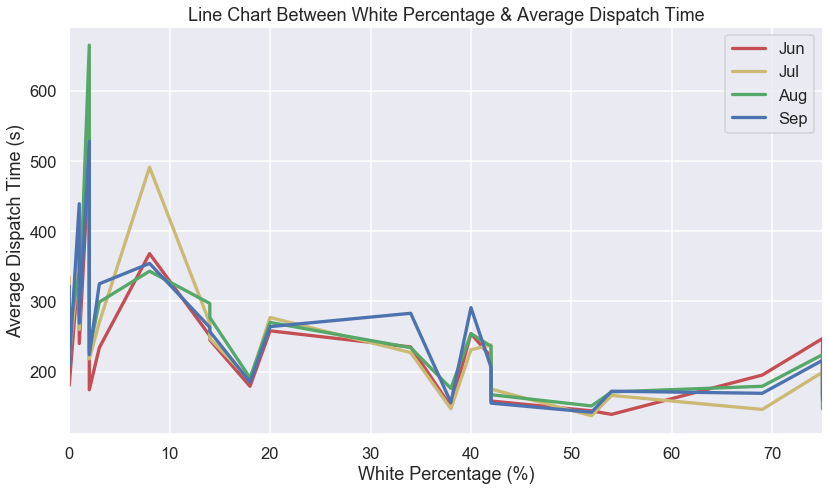

In [55]:
ax = plt.gca()
width = 3.3

dis.plot(kind='line',x='White_per',y='Jun', color = "#C44E52", ax=ax, linewidth=width)
dis.plot(kind='line',x='White_per',y='Jul', color = "#CCB974", ax=ax, linewidth=width)
dis.plot(kind='line',x='White_per',y='Aug', color = "#55A868", ax=ax, linewidth=width)
dis.plot(kind='line',x='White_per',y='Sep', color = "#4C72B0", ax=ax, linewidth=width)

plt.xlabel('White Percentage (%)')
plt.ylabel('Average Dispatch Time (s)')
plt.title('Line Chart Between White Percentage & Average Dispatch Time')
fig = plt.gcf()
fig.set_size_inches(13.5, 7.5)
plt.show()

__[Figure 7]. Line Chart Between White Percentage & Average Dispatch Time.__

#### Line Chart Data Visualization Analysis
This line graph is a plot of percentage of ethnic minorities and police dispatch time for each district. Since the police dispatch time varies for each month, we thought it would be useful to separate our data based on the month. Hence, we have 4 lines, one for each month, to display how each district fared given their ethnic breakdown and police dispatch time. This line graph reveals to us that a low white population percentage corresponds to a higher police dispatch time for the vast majority of districts. We also see a similar trend among the lines itself, namely that certain districts always have a higher dispatch time than other districts consistently regardless of month. Because of this revelation, we decided that month may not play a huge factor in our analysis.

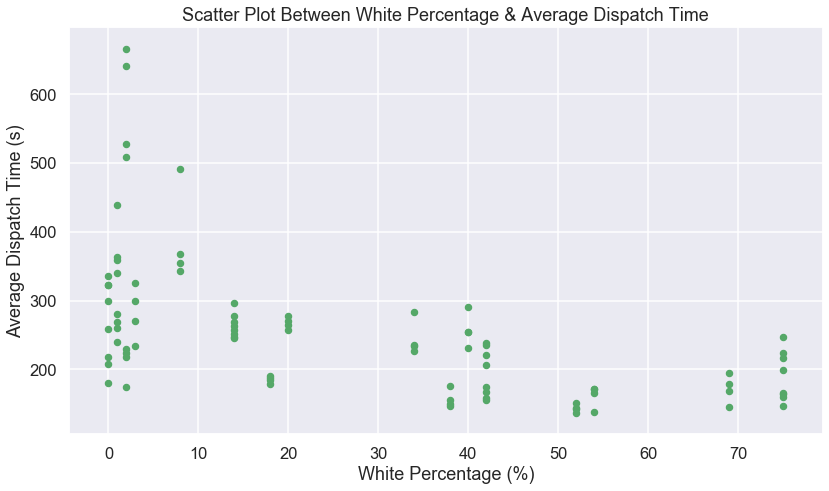

In [56]:
plotC = "#55A868"
width = 3

ax1 = dis.plot(kind='scatter', x='White_per', y='Jun', color=plotC, linewidth=width)    
ax2 = dis.plot(kind='scatter', x='White_per', y='Jul', color=plotC, ax=ax1, linewidth=width)    
ax3 = dis.plot(kind='scatter', x='White_per', y='Aug', color=plotC, ax=ax1, linewidth=width)
ax4 = dis.plot(kind='scatter', x='White_per', y='Sep', color=plotC, ax=ax1, linewidth=width)

plt.xlabel('White Percentage (%)')
plt.ylabel('Average Dispatch Time (s)')
plt.title('Scatter Plot Between White Percentage & Average Dispatch Time')
fig = plt.gcf()
fig.set_size_inches(13.5, 7.5)
plt.show()


__[Figure 8]. Scatter Plot Between White Percentage & Average Dispatch Time.__
#### Scatter Plot Data Visualization Analysis
This scatterplot shows all the districts on different months plotted against police dispatch time and white percentage. It reveals to us that even though the previous line graph indicated that there was a significant spike in police dispatch time for districts with an extremely low white population percentage, this is not the case for every district. Some districts with 10% white population receive the same police dispatch time as districts with 50% white population. It reveals that the spike is due to certain outliers in the dataset, where these districts with low white population percentage, have a much longer time in receiving police assistance.

### GeoMap Analysis 

In [57]:
# set the filepath and load Chicago Map in a shapefile
fp = "geo_export_fe53e91c-1d1a-470b-86d5-341e72617479.shp"
map_df = gpd.read_file(fp)
map_df.head()

,dist_label,dist_num,geometry
0,17TH,17,"POLYGON ((-87.71067 41.99737, -87.71067 41.997..."
1,20TH,20,"POLYGON ((-87.66029 41.99092, -87.66029 41.990..."
2,31ST,31,"POLYGON ((-87.82818 41.98384, -87.82816 41.983..."
3,31ST,31,"POLYGON ((-87.83365 41.97535, -87.83366 41.974..."
4,19TH,19,"POLYGON ((-87.64492 41.96973, -87.64431 41.969..."


In [58]:
# Read in the cleaned data
df_crimes = pd.read_csv("Chicago_Crime_2013.csv")
df_dispatch = pd.read_csv("cleaned_dispatch_time.csv")
df_crimes['District'].head()

0     3.0
1     3.0
2     1.0
3    17.0
4    25.0
Name: District, dtype: float64

In [64]:
# Create a new dataframe df_districts that contains number of crimes and number of arrests per district
df_districts = pd.DataFrame(columns=["dist_num", "num_crimes", 'white_per', 'dispatch_time'])
df_districts['dist_num'] = list(range(1, 26))
df_districts['num_crimes'] = 0
df_districts['num_arrests'] = 0
df_districts['white_per'] = 0
df_districts['dispatch_time'] = 0
df_districts = df_districts.set_index('dist_num')

for index, row in df_crimes.iterrows():
    district_number = int(row['District'])
    df_districts.at[district_number, 'num_crimes'] += 1
    
    if row['Arrest'] == True:
        df_districts.at[district_number, 'num_arrests'] += 1
        
for index, row in df_dispatch.iterrows():
    district_number = int(row['No.'])
    avg_dispatch_time = int((row['Jun'] + row['Jul'] + row['Aug'] + row['Sep'])/4)
    white_percentage = int(row['White %'])
    
    df_districts.at[district_number, 'white_per'] = white_percentage
    df_districts.at[district_number, 'dispatch_time'] = avg_dispatch_time
    
        
    
df_districts = df_districts.reset_index()
df_districts.head()

,dist_num,num_crimes,white_per,dispatch_time,num_arrests
0,1,4328,52,143,1198
1,2,4820,18,185,1290
2,3,5907,2,585,1540
3,4,6540,8,389,1503
4,5,4879,1,375,1355


In [65]:
# Merge the geoframe and our dataframe
map_df['dist_num'] = map_df['dist_num'].astype('int64')
merged = map_df.merge(df_districts)

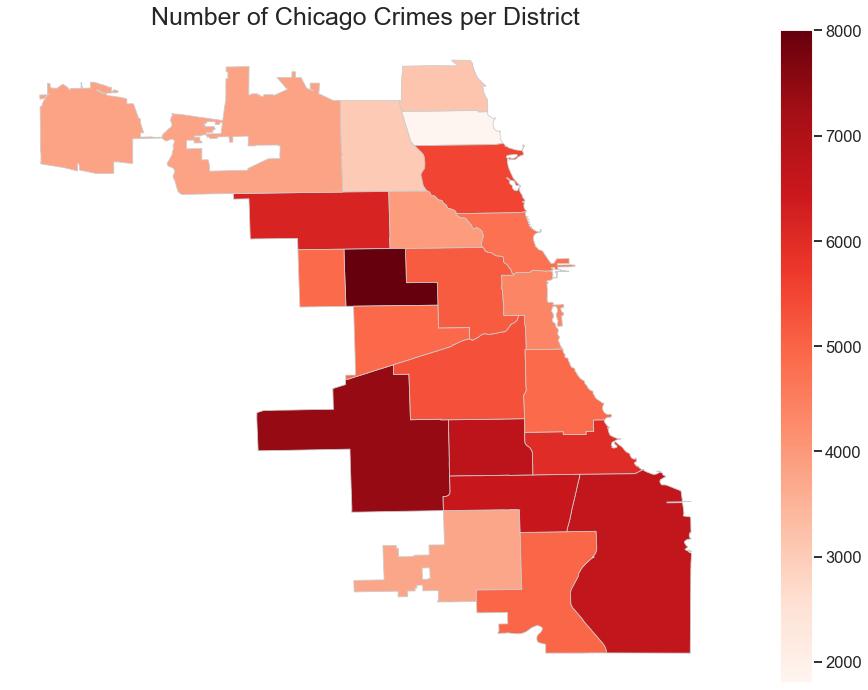

In [79]:
variable = 'num_crimes'
# set the range for the choropleth
vmin, vmax = 1800, 8000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Number of Chicago Crimes per District', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
fig.savefig("crimes.png", dpi=300)

__[Figure 9] Number of Chicago Crime Per District Heat Map.__

#### Data Visual Analyzation of Chicago Crime Per District Heat Map
The number of Chicago crimes per district heatmap gives us a bigger picture on how the crimes being committed are distributed on a map. Primarily most of the crimes committed are within the southern side of Chicago, with a few districts on the upper middle also reflecting to have a lot of crimes. When it is compared to the other heatmaps (below), we see that these regions don’t overlap with the primarily white populated districts. However, comparing it to the dispatch times heatmap and the amount of arrest heatmap, the overlap reflects the data, and clearly shows that these regions are the most active when it comes to crimes.  

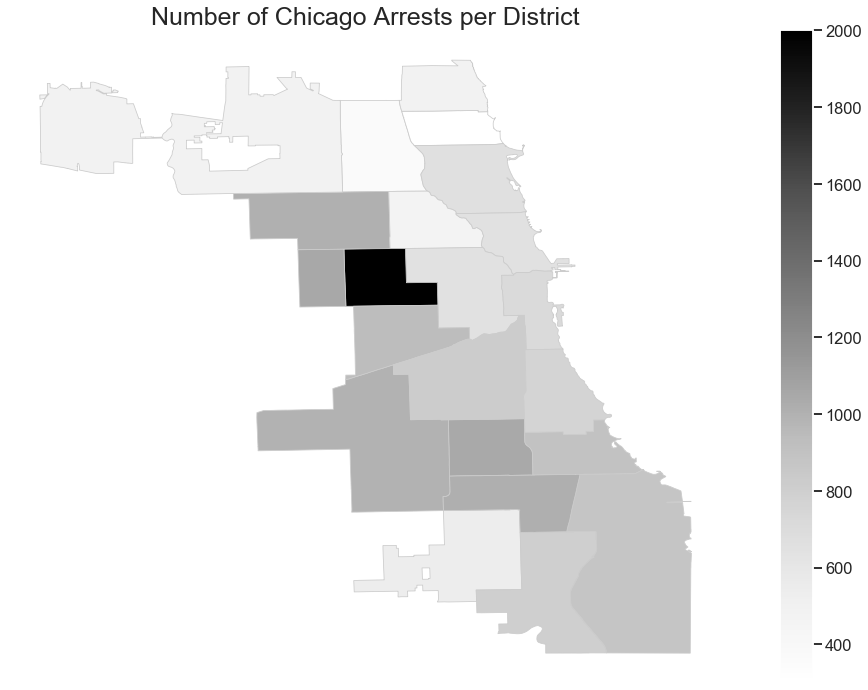

In [69]:
variable = 'num_arrests'
# set the range for the choropleth
vmin, vmax = 300, 2000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Greys', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Number of Chicago Arrests per District', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
fig.savefig("arrests.png", dpi=300)

__[Figure 10] Number of Chicago Arrests per District Heat Map.__

#### Data Visual Analyzation of Number of Chicago Arrest per District Heat Map
The number of Chicago arrests per district heatmap reveals which districts are getting more arrests per crime. There is a very clear indicator that reveals most of the arrests are concentrated in the middle-west area, having significantly more arrest than any other district. When it is compared to the crimes committed heatmap __[Figure 9]__, it confirms that this particular district has the most activity when it comes to crimes. This region also has one of the faster dispatch times when it is compared to the dispatch time heatmap __[Figure 12]__, confirming that it is a very active district.

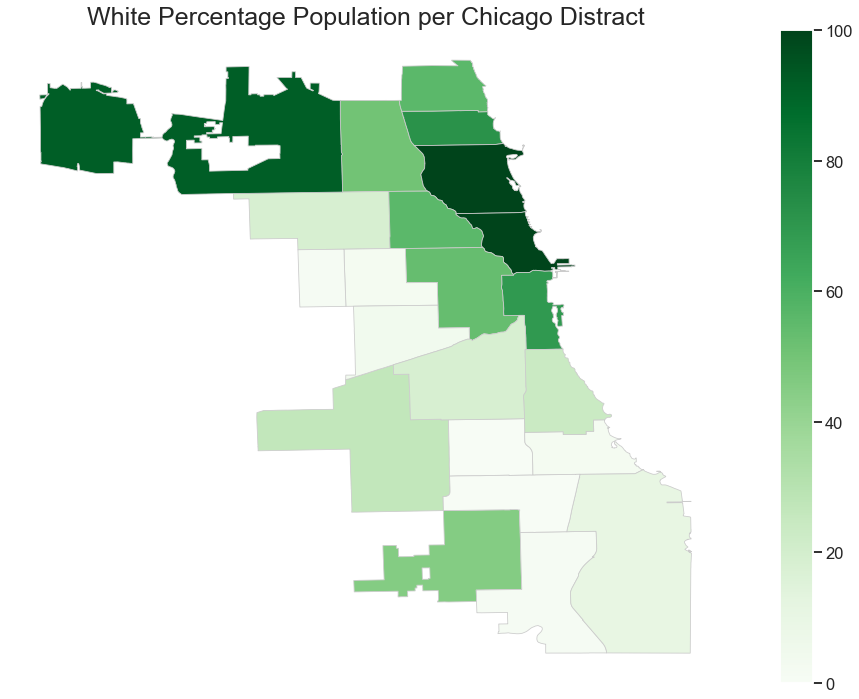

In [70]:
variable = 'white_per'
# set the range for the choropleth
vmin, vmax = 0, 100
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('White Percentage Population per Chicago Distract', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
fig.savefig("white_per.png", dpi=300)

__[Figure 11] White Percentage Population per Chicago District Heat Map.__
#### Data Visual Analyzation of White Percentage Population per Chicago District Heat Map.
The white percentage per Chicago districts heatmap reveals how the white population is distributed. Primarily most of the white population is within the northern side of Chicago, while most of the south has 0% to 50% white population. Comparing this to the other heatmaps(above and below figures), it reveals extensive information regarding crimes committed and police dispatch time relative to the other districts. 

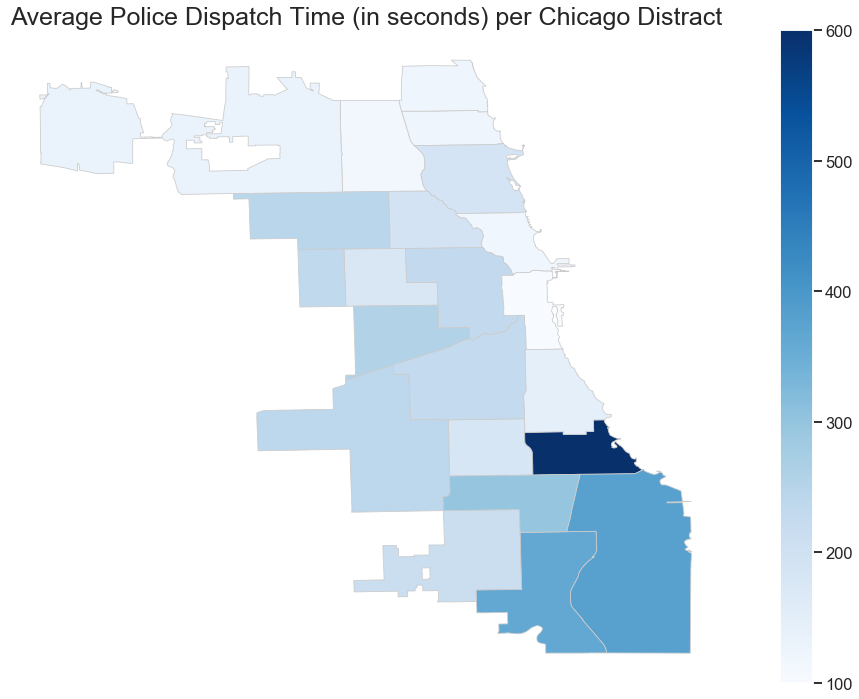

In [71]:
variable = 'dispatch_time'
# set the range for the choropleth
vmin, vmax = 100, 600
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Average Police Dispatch Time (in seconds) per Chicago Distract', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
fig.savefig("dispatch.png", dpi=300)

__[Figure 12] Average Police Dispatch Time(s) per Chicago District Heat Map.__
#### Data Visual Analyzation for Average Police Dispatch Time(s) per Chicago District Heat Map
The police dispatch time per Chicago district heatmap demonstrates important information regarding the different populations in Chicago. Overlapping it with the previous heatmap __[Figure 11]__, you can see how police dispatch time can be related to white population in a district. The longest police responses occur in the south east region of Chicago, which is also where the highest percentage of minorities live. Although you could come to a conclusion that the higher response time is related to the percentage of white population, the heatmap also reveals other information. Although some districts have a near 0% white population, it also receives similar response time to districts with a much higher white population. The similarity is that their geographic location is near the northern part of Chicago. Only in the southern parts of Chicago do the police response times increase, and it is hard to definitively tie it in with white population.

### Linear Model Visualization & Analysis
To test our hypothesis, we wanted to check if white percentage in each district predicts average dispatch time. We do this by using linear modeling, a concept that was covered in A4, and print out a summary of our model.

In [80]:
#create a new dataframe named dis_new which contains only the white_% and avg_dispatch_time
#adding a column with average dispatch time
dis['avg_dispatch_time'] = np.nan
for index, row in dis.iterrows():
    avg_dispatch_time = int((row['Jun'] + row['Jul'] + row['Aug'] + row['Sep'])/4) 
    dis['avg_dispatch_time'][index] = avg_dispatch_time

dis_new = dis[['White_per', "avg_dispatch_time"]]
dis_new

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,White_per,avg_dispatch_time
0,75,159.0
1,75,221.0
2,69,172.0
...,...,...
19,1,375.0
20,0,216.0
21,0,319.0


##### Check the correlation between white percentage and dispatch time 

In [81]:
dis_new.corr()

,White_per,avg_dispatch_time
White_per,1.00,-0.59
avg_dispatch_time,-0.59,1.00


In [74]:
# Statmodels & patsy
import patsy
import statsmodels.api as sm

#Perform Linear Modeling for 'avg_dispatch_time''s dependency on 'White_%'
outcome, predictors = patsy.dmatrices('avg_dispatch_time ~ White_per', dis)

#  This step initializes the model, and provides the data (but does not actually compute the model)
mod = sm.OLS(outcome, predictors)

res = mod.fit()

# Check out the results
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:      avg_dispatch_time   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 11 Dec 2019   Prob (F-statistic):            0.00410
Time:                        21:55:08   Log-Likelihood:                -127.48
No. Observations:                  22   AIC:                             259.0
Df Residuals:                      20   BIC:                             261.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    313.6509     26.287     11.932      0.0

__[Figure 13] OLS Regression Results on Ave. Dispatch Time & White %__
#### Linear Model Visual Analyzation of Predicting White % & Ave. Dispatch Time
We see that the p-value listed under the P>|t| column is 0.004, which is extremely low. This means that it appears to be the case that white percentage is a good predictor of average dispatch time. 


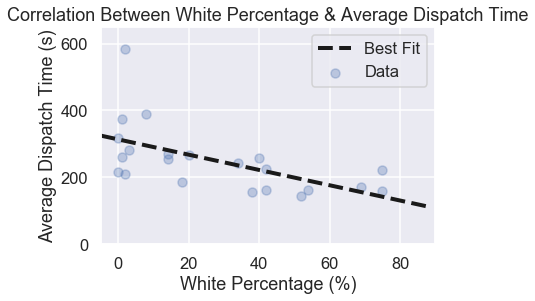

In [75]:
## Ploting the model fit line

# Plot the orginal data (as before)
plt.scatter(dis_new['White_per'], dis_new['avg_dispatch_time'], alpha=0.3, label='Data');

# Generate and plot the model fit line
xs = np.arange(-5, 90)
ys = -2.2853 * xs + 313.6509     
plt.plot(xs, ys, '--k', linewidth=4, label='Best Fit')

plt.xlabel('White Percentage (%)')
plt.ylabel('Average Dispatch Time (s)')
plt.title('Correlation Between White Percentage & Average Dispatch Time')
plt.xlim(-5, 90)
plt.ylim(0, 650)
plt.legend();

__[Figure 14] Correlation Between White Percentage & Average Dispatch Time Model Fit Line.__
#### Linear Model Visual Analyzation on Correlation Between White Percentage & Average Dispatch Time Model Fit Line.
We wanted to visualize the trend to confirm our belief that white percentage and average dispatch time were negatively correlated. Our graph shows a higher dispatch time corresponds to a lower white percentage and vice versa, proving that it is negatively correlated.

In [76]:
df_districts.head()

,dist_num,num_crimes,white_per,dispatch_time,num_arrests
0,1,4328,52,143,1198
1,2,4820,18,185,1290
2,3,5907,2,585,1540
3,4,6540,8,389,1503
4,5,4879,1,375,1355


##### Check the correlation between white percentage and number of crimes

In [77]:
#Create a linear model to predict dispatch_time from both number of crimes and white percentage
outcome_3, predictors_3 = patsy.dmatrices('num_crimes ~ white_per', df_districts)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:             num_crimes   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                   0.09372
Date:                Wed, 11 Dec 2019   Prob (F-statistic):              0.762
Time:                        21:55:08   Log-Likelihood:                -226.82
No. Observations:                  25   AIC:                             457.6
Df Residuals:                      23   BIC:                             460.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4536.8273    608.217      7.459      0.0

__[Figure 15] OLS Regression Results of Correlation between Crimes and White %.__
#### Linear Model Visual Analyzation of OLS Regression Results of Correlation between Crimes and White %.
We now want to check how the number of crimes factors into our average dispatch time. Before conducting this analysis, however, we must first make sure that number of crimes and white percentage are not correlated (and are independent). If they were correlated, then using both as predictors would not tell us much information about how much they predict average dispatch time, as the comparison would not be valid. We use a linear model to judge this. We print out the summary as before in the notebook. Our summary shows that the p-value listed under the P>|t| column is 0.762, meaning that white percentage is not a good predictor of number of crimes at all. This implies that they are independent variables.

### Multivariate regression
We now know that the number of crimes and white percentage per district is not correlated. Hence, we now want to confirm our hypothesis by ensuring that white percentage per district is the primary cause of differing dispatch time. Hence, we use the multivariate regression model to judge this. We print out the summary as before in the notebook.

##### Check the correlation between white percentage, dispatch time and number of crimes

In [78]:
#Create a linear model to predict dispatch_time from both number of crimes and white percentage
outcome_2, predictors_2 = patsy.dmatrices('dispatch_time ~ num_crimes + white_per', df_districts)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:          dispatch_time   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     12.54
Date:                Wed, 11 Dec 2019   Prob (F-statistic):           0.000232
Time:                        21:55:08   Log-Likelihood:                -146.27
No. Observations:                  25   AIC:                             298.5
Df Residuals:                      22   BIC:                             302.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.2056     45.862      1.182      0.2

__[Figure 16]OLS Regression Results of Correlation Between White %, Dispatch Time, and Crimes.__
#### Multivariate Regression Visual Analyzation of Correlation Between White %, Dispatch Time, and Crimes.
Our summary shows that the p-value listed under the P>|t| column is roughly 0 for num_crimes but around 0.38 for white_per. This indicates that num_crimes is a better predictor of dispatch time than white percentage.

## Data Analysization Overview & Final Results 
1. With the cleaned data, we visualized several variables on a Chicago District Map including number of crimes, number of arrests, white %, and police dispatch time.
2. By showing the highest counts of each variable for every single district, we could show logical or contrasting results based on our expectations in the hypothesis. Ex: Despite higher crime rates in certain districts, is there a longer dispatch time in these same districts.
3. Using GeoPandas, we used the data from the cleaned 2013 dataframe and created another dataframe df_districts that maps district number to the location so that GeoPandas can create the map, as well as the number of crimes, number of arrests, white %, and police dispatch time for each district number.
4. We can easily plot the data now per district for each variable. Below are the results we found.


#### Data Analysis of Chicago Crime Heat Map [Figure 6]

The GIF revealed the general mapping of crimes across all of Chicago. Red and green areas indicate a significant amount of crime within the region, but red reveals a stronger concentration within that area. As the map zooms in, the graph becomes increasingly green as you view areas in which crimes occured. It provides general information on where the largest concentration of crimes primarily happen in Chicago, such as near the coast, or on the west side of Chicago.

#### Data Analysis of the Line Chart [Figure 7] & Scatter plot [Figure 8]

After reviewing both graphs of the data, we found that there is a significant increase in response time in some districts where the white population is less than 10%. Only in these districts exist a dispatch time longer than 5 minutes. Districts such as Grand Crossing have a white population of less than 5%, but dispatch times of being over 500 seconds, indicating a potential bias from police towards these districts. However, there are also districts where the dispatch time is almost the same as higher white population % districts. Reasons for this could potentially be the difference in how many police officers are on patrol, or possibly the resources allocated to each district. In general, the fastest response times tend to be whenever there is a district with a white population of 40-60%. Although there are extremes for the lower white % population, it is possible they are outliers, but overall dispatch times tend to be the same throughout all districts except for those with extreme minorities.   

#### Data Analysis of Comparing Crime [Figure 9] & Arrest Map[Figure 10] with Police Dispatch Time Map [Figure 12]

The number of Crimes __[Figure 9]__ and number of Arrests __[Figure 10]__ are fairly proportional per district according to the district map, so we could group those maps together when referring to the data. When we compare these maps with the Police Dispatch Time Map __[Figure 12]__, one would expect that the districts with higher crimes and arrests would have at least a lower dispatch time than the districts with lower crimes and arrests due to the necessity to fix crime in those regions. However, many high crime/arrests South Side districts such as Gresham, Calumet, Grand Crossing, and South Chicago have some of the worst police response times, despite the fact that the number of violent crime per officer ratio is more or less the same regardless of district. To investigate why this ends up being the case, we have to explore another relationship between two maps.

#### Data Analysis Comparing Police Dispatch Time [Figure 12] and White % Map [Figure 11]
We can now compare the same Police Dispatch Time map __[Figure 12]__ with the White % per district map __[Figure 11]__ to see if our hypothesis is correct. Some of the highest white percentage districts such as Near North, Town Hall, Jefferson Park, and Central have the fastest dispatch times, with all being under 200 seconds. They also have lower crime rates. On the contrast, the 4 high crime districts mentioned in the previous paragraph have the worst dispatch times with all being above 300 seconds(Grand Crossing is above 500 sec!). These same districts have white percentages below 5%. This is strong evidence that there is a police bias against districts with lower white percentages, even when those districts have more crimes and arrests. 

#### Linear Model & Multivariate Regression Results Summary
- In __[Figure 13]__, we see that in OLS Regression results on Ave. Dispatch Time & White %, the p-value listed under the P>|t| column is 0.004 is really low. This shows that white percentage is a good predictor of average dispatch time.

- In __[Figure 14]__, we see that the correlation between White % & Ave Dispatch Time Model Fit Line, were negatively correlated. 

- In __[Figure 15]__, the OLS Regression results of correlation between crimes and white %, show that white percentage is not a good predictor of number of crimes at all. This implies that they are independent variables.

- In __[Figure 16]__, the OLS Regression results of correlation between white %, dispatch time, and crimes show that num_crimes is a better predictor of dispatch time than white percentage.

# Ethics & Privacy
For our final project, we’re exploring the ethics of the law enforcement and their performance in relation to minorities and crimes in their district. However, we also uphold our own ethics to consider the sensitivities that our analysis and conclusion may suggest. We acknowledge that our project uses public government data that only reflects Chicago, and does not reflect our most current year. There is also a possibility that not all crimes may be reported in a given district, which may affect the data. With all this in mind, any possible conclusions made from our analysis may not be adequate enough to reflect current behaviors of our law enforcement and crimes nation-wide. In addition, any conclusion about any correlation seen from our dataset cannot prove a causal effect on any behavior of the law enforcement. 

To uphold privacy, we followed the Safe Harbor Method to make sure we only used columns that didn’t infringe on any personal sensitive information. Our dataset already came with data that passes the Safe Harbor method and does not include any personal information that could be traced back to an individual. We also excluded more from our dataset that was irrelevant as discussed in the Dataset portion above.


# Conclusion & Discussion
### Discussion
Based on our results from our data analysis, we have confirmed that our hypothesis was actually incorrect. We did find a correlation between the number of crimes committed and the number of minorities in the district. However we found that instead of the police dispatch (response) time being slower, it was significantly much faster. We believe that perhaps due to the high amount of crimes in the area, perhaps there are more police officers stationed nearby to respond faster. Overall, there is a positive correlational relationship between the number of minorities, rate of crimes in the district, as well as how fast a police will respond to the crime in the area. We cannot conclude that there is a high amount of crimes because of minorities, nor that the police response time is faster due to the high minority population. However, our data does show that with a positive correlation between the minorities and the rate of crimes in the district, police response will be faster. 

### Limitations of our Project
Some limitations that we have in regards to our project acknowledges that there may be different monetary resources that the law enforcement are granted in each different district that may affect quality of service. As for things we could explore more, we could have looked into the type of crime being committed in these districts. For this project, we looked over all crimes committed, regardless of their severity. Filtering out certain crimes could have changed our edge cases and dropped some of the districts with less crimes completely from our analysis.  

### For Future Endeavors 
For future evaluations of police dispatch times, it would be more constructive to include the average income per district incorporated. This would give us a correlation between minorities and low income households, giving a much deeper analysis into how poor living communities result in a higher crime rate. And as a byproduct of  poor living communities and higher crime rates, there would be more crimes in these districts which would result in more police activity. Additionally, including the amount of patrolling that these districts get would tell us more on the dispatch time per district.
